#                                      Exploring MPG Dataset

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
# Loading the dataset
data=sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
# Let's look at the no of rows and columns in our data
print('No of Rows: ', data.shape[0], '\nNo of Columns: ', data.shape[1])

No of Rows:  398 
No of Columns:  9


In [3]:
#Let's now look into the datatypes of columns in the data and if there are any missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Inference: There are two alphanumeric columns, Origin and Name. Also, there are missing values in horsepower.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


Inference:

1. There is a deviation of almost 8 units in mileage per gallon in every observation, and 75% of cars have milege less than equal to 29 units. Also since maximum is 46.6 we can say there is some skewness on the right side.

2. The average displacement in 193.43, and with deviation of 104 units. It is evident that displacement is skewed and there are chances of getting an outlier.

3. 75% of cars have horsepower less than 126, and it is also positively skewed.

4. Weight is also positively skewed.

5. Acceleration is seemingly well distributed with less skewness as mean and median coincide.

6. Model Year is close to normal distribution as mean and median are same.

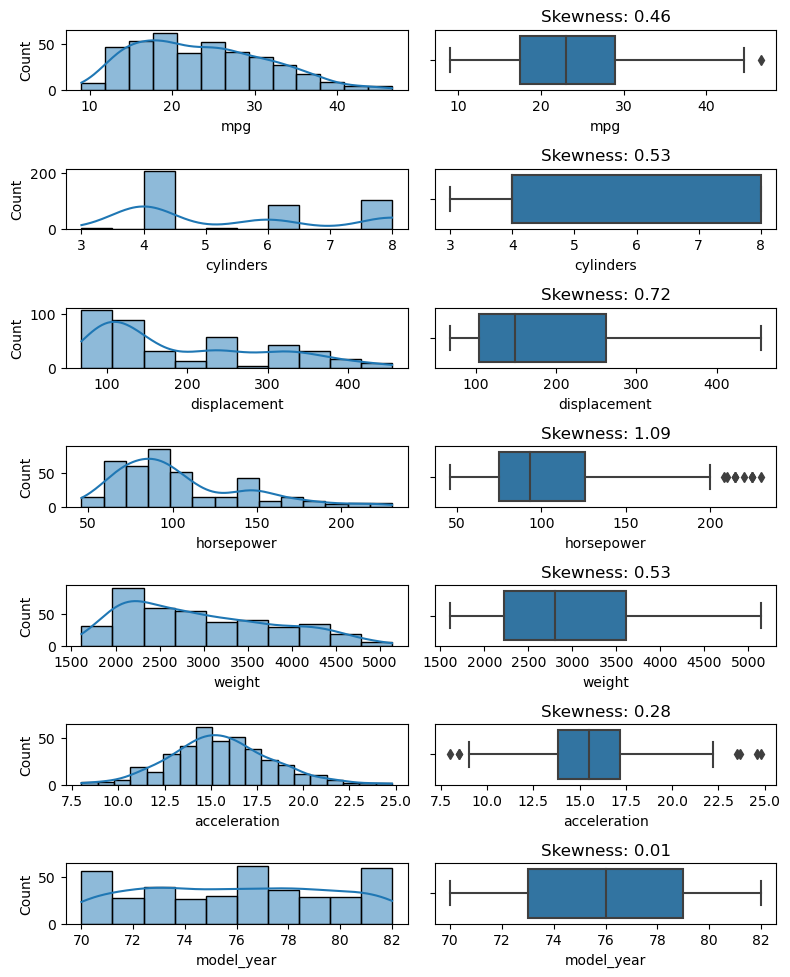

In [25]:
t=1
r=2
plt.figure(figsize=(8, 15))
for i in num_cols:
    plt.subplot(7, 2, t)
    sns.histplot(data=data, x=i,kde=True)
    plt.subplot(7, 2, r)
    sns.boxplot(data=data, x=data[i])
    plt.tight_layout()
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t=t+2
    r=r+2
plt.show()

#### Inference: 

Mpg, Horsepower, and Acceleration have outliers. 
Also, we can see that the above estimation that we had made after seeing the 5 point summary is true and can be proved visually.


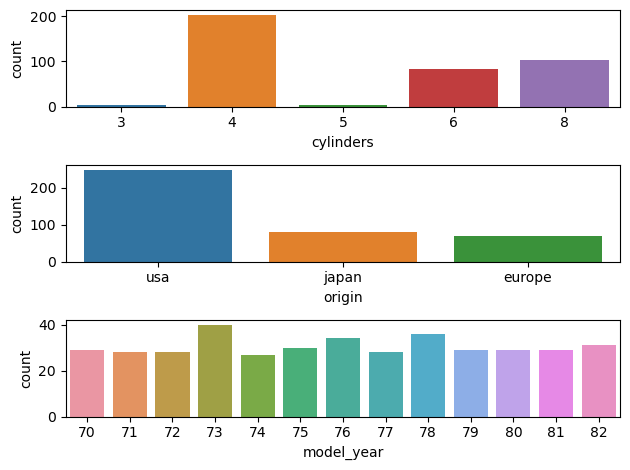

In [27]:
t=1
for i in cat_cols:
    plt.subplot(3,1, t)
    sns.countplot(data=data, x=data[i])
    t=t+1
    plt.tight_layout()
plt.show()

Inference: 
1. Maximum cars have 4 cylinders.
2. Maxmimum cars are made in USA, followed by Japan and Europe
3. All the years have nearly equal distribution of cars.

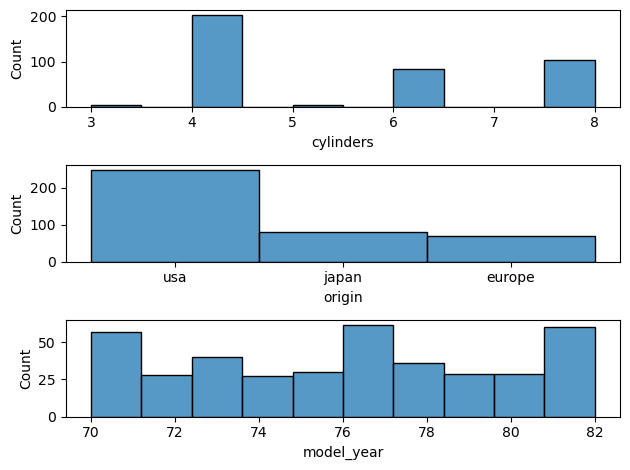

In [28]:
t=1
for i in cat_cols:
    plt.subplot(3,1, t)
    sns.histplot(data=data, x=data[i])
    t=t+1
    plt.tight_layout()
plt.show()

<Figure size 800x1500 with 0 Axes>

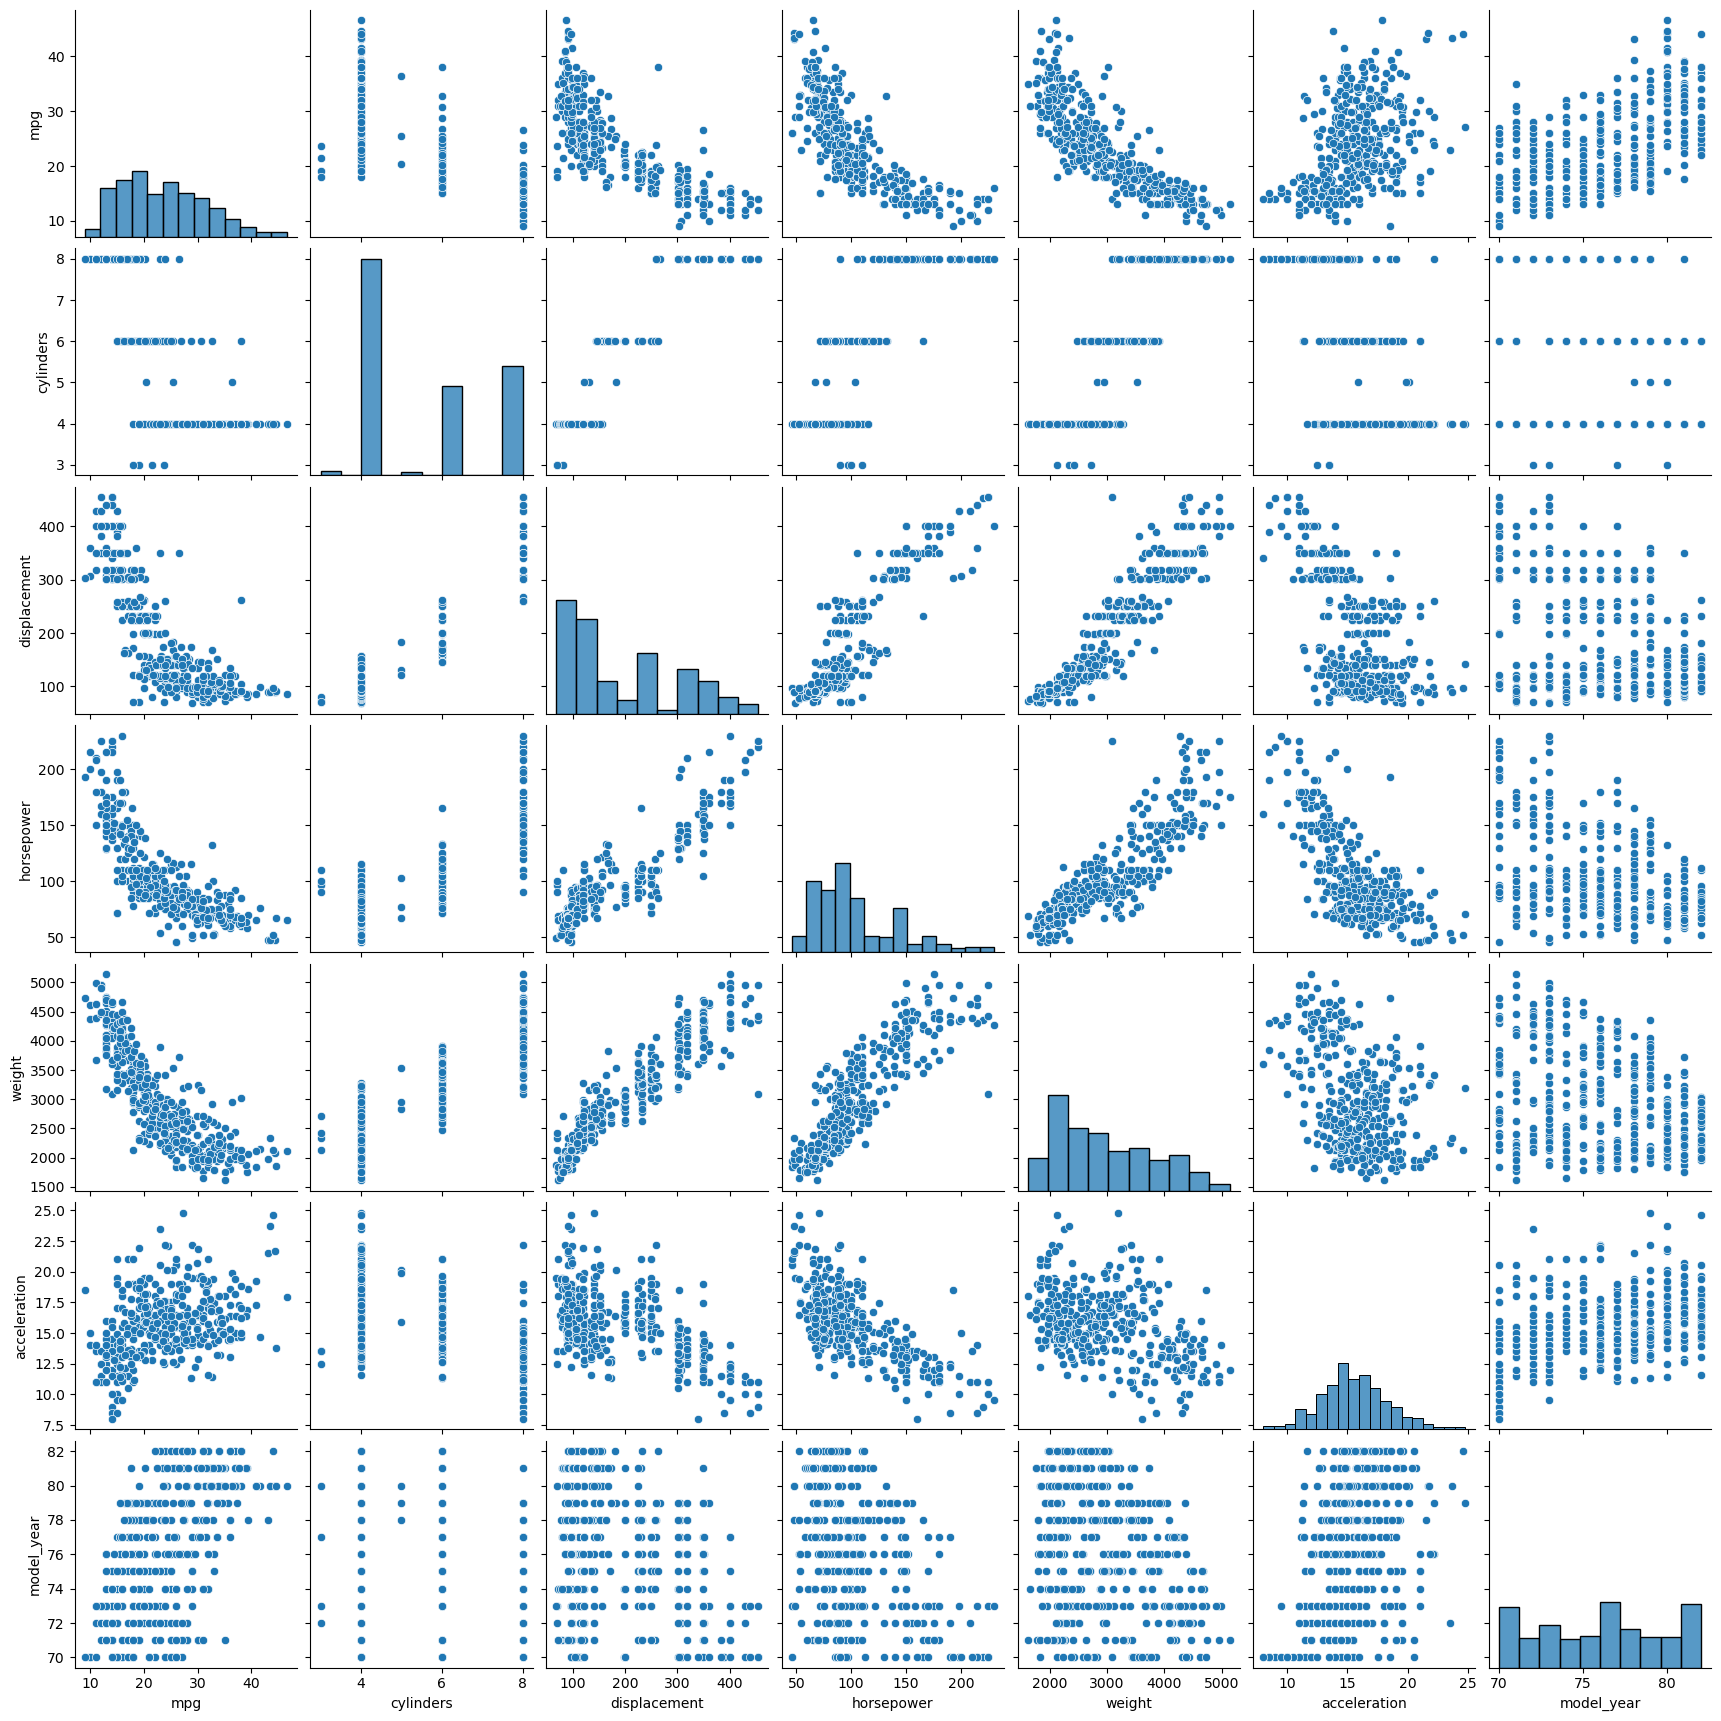

In [31]:
plt.figure(figsize=(8, 15))
sns.pairplot(data=data)

<Axes: >

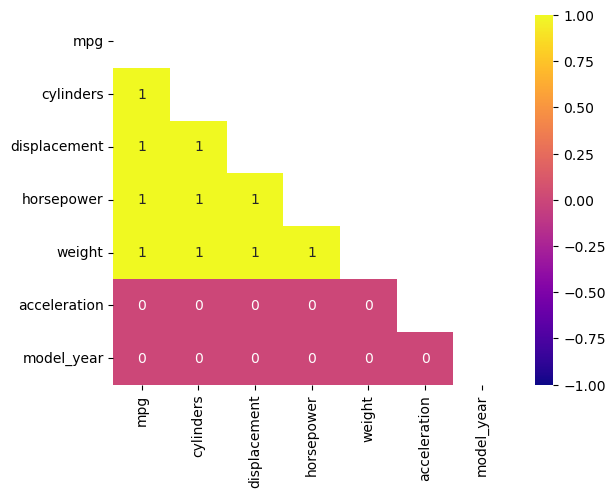

In [39]:
sns.heatmap(abs(data[num_cols].corr())>.75,annot=True, cmap='plasma', mask=np.triu(data[num_cols].corr()), vmax=1, vmin=-1)

In [40]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [43]:
data[num_cols]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [3]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
sc=StandardScaler()
mm=MinMaxScaler()

In [ ]:
scaled_mm_data=pd.DataFrame(mm.fit_transform(data[num_cols]), columns=num_cols)
scaled_mm_data

In [58]:
q3=data['horsepower'].quantile(.75)
q3

126.0

In [59]:
q1=data['horsepower'].quantile(.25)
q1


75.0

In [61]:
iqr=q3-q1
iqr

51.0

In [62]:
ul=q3+1.5*iqr
ul

202.5

In [64]:
ll=q1-1.5*iqr
ll

-1.5

<Axes: xlabel='horsepower'>

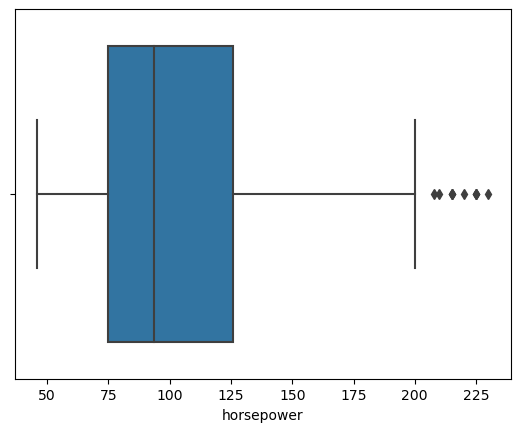

In [69]:
sns.boxplot(data=data, x=data['horsepower'])

In [68]:
data[data['horsepower']>ul]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix


In [79]:
data[~((data['horsepower']>ul) | (data['horsepower']<ll))].shape

(388, 9)

In [ ]:
data[]

In [7]:
data['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [8]:
data['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [22]:
num_cols=data.describe().columns

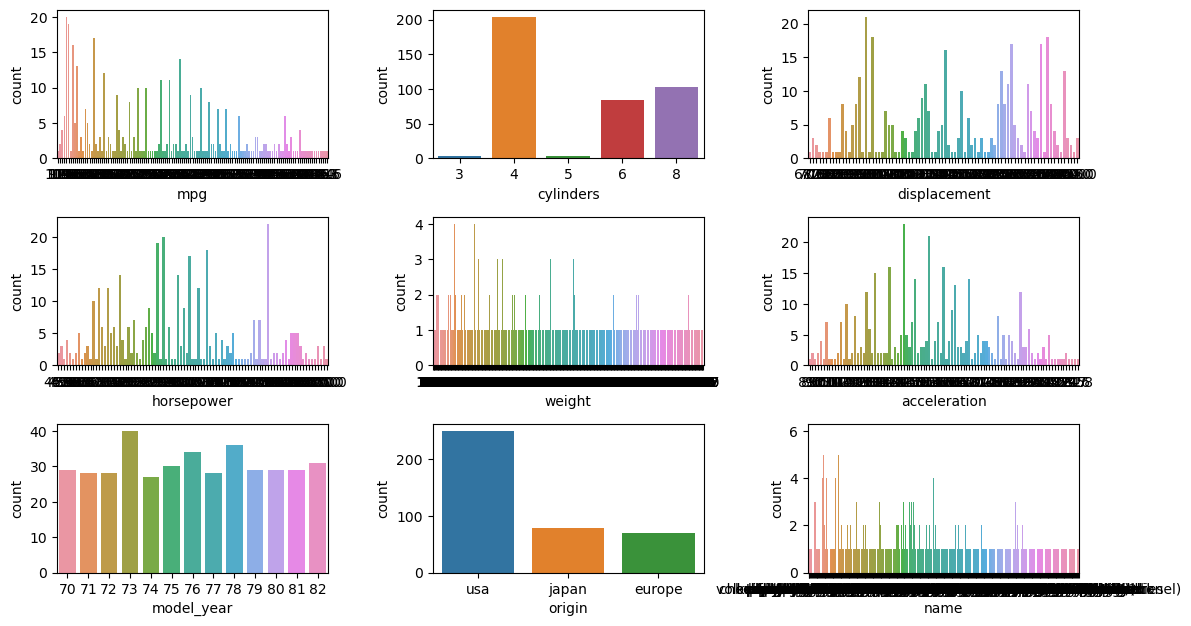

In [10]:
t=1
plt.figure(figsize=(12, 8))
for i in data.columns:
    plt.subplot(4, 3, t)
    sns.countplot(data=data, x=data[i])
    plt.tight_layout()
    t=t+1
plt.show()

In [11]:
data['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [12]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [13]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [21]:
num_cols=data.drop(columns=['cylinders', 'origin', 'model_year']).columns
num_cols

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'name'], dtype='object')

In [26]:
cat_cols=['cylinders', 'origin', 'model_year']
cat_cols

['cylinders', 'origin', 'model_year']

In [10]:
data['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [16]:
samp_data = {
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 20, 15, 25, 30]
}
samp_data

{'Category': ['A', 'B', 'A', 'B', 'A'], 'Value': [10, 20, 15, 25, 30]}

In [35]:
df_samp_data['Cylinders']=[2, 3, 4, 5, None]
df_samp_data

,Category,Value,Gajendra,Cylinders
0,A,10,Shyam,2.0
1,B,20,Ram,3.0
2,A,15,Ghanshyam,4.0
3,B,25,Mohan,5.0
4,A,30,Madan,NaN


In [48]:
df_samp_data.groupby(by='Category')[['Value', 'Cylinders']].mean()

,Value,Cylinders
Category,,
A,18.333333,3.0
B,22.500000,4.0


In [59]:
df_samp_data.groupby(by=['Category', 'Gajendra']).count()

Value  Cylinders
Category Gajendra                   
A        Ghanshyam      1          1
         Madan          1          0
         Shyam          1          1
B        Mohan          1          1
         Ram            1          1

In [63]:
df_samp_data[df_samp_data.Gajendra=='Ram']

,Category,Value,Gajendra,Cylinders
1,B,20,Ram,3.0


In [62]:
data

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
data.shape

(398, 9)

In [11]:
num_cols=['mpg', 'horsepower',
       'acceleration']
num_cols

['mpg', 'horsepower', 'acceleration']

## Outlier Removal from IQR Technique

In [12]:
q3=data[num_cols].quantile(0.75)
q3

mpg              29.000
horsepower      126.000
acceleration     17.175
Name: 0.75, dtype: float64

In [13]:
q1=data[num_cols].quantile(0.25)
q1

mpg             17.500
horsepower      75.000
acceleration    13.825
Name: 0.25, dtype: float64

In [14]:
iqr=q3-q1
iqr

mpg             11.50
horsepower      51.00
acceleration     3.35
dtype: float64

In [15]:
ul=q3+1.5*iqr
ul

mpg              46.25
horsepower      202.50
acceleration     22.20
dtype: float64

In [16]:
ll=q1-1.5*iqr
ll

mpg             0.25
horsepower     -1.50
acceleration    8.80
dtype: float64

In [24]:
(data[num_cols]>ul) | (data[num_cols]<ll)

,mpg,horsepower,acceleration
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
393,False,False,False
394,False,False,True
395,False,False,False
396,False,False,False


In [26]:
data[~((data[num_cols]>ul) | (data[num_cols]<ll)).any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [29]:
data_after_outlier_removal=data[~((data[num_cols]>ul) | (data[num_cols]<ll)).any(axis=1)]
data_after_outlier_removal

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [31]:
data_after_outlier_removal['Model_Year_FE']=max(data['model_year'])-data['model_year']
data_after_outlier_removal

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Model_Year_FE
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,12
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,12
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,12
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,12
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,12
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro,0
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0


In [32]:
data_after_outlier_removal['Model_Year_FE'].value_counts()

Model_Year_FE
9     37
4     36
6     34
7     30
0     30
1     29
11    28
5     28
3     28
8     27
2     27
10    26
12    21
Name: count, dtype: int64

In [33]:
data_after_outlier_removal.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Model_Year_FE
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,12
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,12
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,12
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,12
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,12


In [34]:
del data_after_outlier_removal['model_year']

In [35]:
data_after_outlier_removal.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name,Model_Year_FE
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu,12
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320,12
2,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite,12
3,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst,12
4,17.0,8,302.0,140.0,3449,10.5,usa,ford torino,12


In [36]:
data_after_outlier_removal.origin.value_counts()

origin
usa       237
japan      78
europe     66
Name: count, dtype: int64

In [ ]:
# Frequency Encoding will be done here because there are so many columns hence one hot encoding will not 

1. One hot encoding(Dummy Encoding n-1)
2. Label Encoding
3. Ordinal Encoding
4. Frequency Encoding
5. Target Encoding

In [ ]:
# Label Encoding

In [38]:
data_after_outlier_removal['origin'].replace({'usa':1, 'japan':2, 'europe': 3}, inplace=True)

In [42]:
data_after_outlier_removal.origin.value_counts()

origin
1    237
2     78
3     66
Name: count, dtype: int64

In [43]:
# Frequency Encoding

In [44]:
data_after_outlier_removal.origin.value_counts(normalize=True)

origin
1    0.622047
2    0.204724
3    0.173228
Name: proportion, dtype: float64

In [45]:
data_after_outlier_removal.origin.value_counts(normalize=True).to_dict()

{1: 0.6220472440944882, 2: 0.2047244094488189, 3: 0.1732283464566929}

In [46]:
df=data_after_outlier_removal.origin.value_counts(normalize=True).to_dict()

In [49]:
data_after_outlier_removal['origin']=data_after_outlier_removal['origin'].map(df)

In [51]:
data_after_outlier_removal.origin.value_counts()

origin
0.622047    237
0.204724     78
0.173228     66
Name: count, dtype: int64

In [52]:
data['origin'].replace({'usa':1, 'japan':2, 'europe': 3}, inplace=True)

In [53]:
data.origin.value_counts()

origin
1    249
2     79
3     70
Name: count, dtype: int64

In [54]:
data['origin'].replace({1: 0.6220472440944882, 2: 0.2047244094488189, 3: 0.1732283464566929}, inplace=True)

In [55]:
data.origin.value_counts()

origin
0.622047    249
0.204724     79
0.173228     70
Name: count, dtype: int64

In [56]:
data.weight.value_counts

<bound method IndexOpsMixin.value_counts of 0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64>

In [ ]:
# Target Encoding
# Here we are considering weight as a target

In [61]:
data_after_outlier_removal['origin']=data_after_outlier_removal['origin'].replace({0.622047: 'usa',0.204724:'japan', 0.173228:'europe'},inplace=True)

In [62]:
data_after_outlier_removal

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name,Model_Year_FE
0,18.0,8,307.0,130.0,3504,12.0,None,chevrolet chevelle malibu,12
1,15.0,8,350.0,165.0,3693,11.5,None,buick skylark 320,12
2,18.0,8,318.0,150.0,3436,11.0,None,plymouth satellite,12
3,16.0,8,304.0,150.0,3433,12.0,None,amc rebel sst,12
4,17.0,8,302.0,140.0,3449,10.5,None,ford torino,12
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,None,chevrolet camaro,0
393,27.0,4,140.0,86.0,2790,15.6,None,ford mustang gl,0
395,32.0,4,135.0,84.0,2295,11.6,None,dodge rampage,0
396,28.0,4,120.0,79.0,2625,18.6,None,ford ranger,0


In [59]:
data_after_outlier_removal.groupby(by='origin')['weight'].median()

Series([], Name: weight, dtype: float64)

In [64]:
data.origin.value_counts()

origin
0.622047    249
0.204724     79
0.173228     70
Name: count, dtype: int64

In [69]:
data['origin'].replace({0.6220472440944882:'usa',0.2047244094488189:'japan', 0.1732283464566929:'europe'}, inplace=True)

In [70]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [71]:
data.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [81]:
# Target Encoding
# Here we are considering weight as a target

In [82]:
data.groupby(by='origin')['weight'].median()

origin
europe    2240.0
japan     2155.0
usa       3365.0
Name: weight, dtype: float64

In [86]:
data.groupby(by='origin')['weight'].median().to_dict()

{'europe': 2240.0, 'japan': 2155.0, 'usa': 3365.0}

In [87]:
df2=data.groupby(by='origin')['weight'].median().to_dict()
df2

{'europe': 2240.0, 'japan': 2155.0, 'usa': 3365.0}

In [88]:
data['origin'].replace({'europe': 2240.0, 'japan': 2155.0, 'usa': 3365.0}, inplace=True)

In [89]:
data.origin.value_counts()

origin
3365.0    249
2155.0     79
2240.0     70
Name: count, dtype: int64

In [90]:
data.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year  origin  name                    
9.0   8          304.0         193.0       4732    18.5          70          3365.0  hi 1200d                    1
27.0  4          151.0         90.0        2950    17.3          82          3365.0  chevrolet camaro            1
                 140.0         86.0        2790    15.6          82          3365.0  ford mustang gl             1
                 112.0         88.0        2640    18.6          82          3365.0  chevrolet cavalier wagon    1
                 101.0         83.0        2202    15.3          76          2240.0  renault 12tl                1
                                                                                                                ..
18.5  6          250.0         110.0       3645    16.2          76          3365.0  pontiac ventura sj          1
                               98.0        3525    19.0          77          3365.0  